# Predicting Stock Prices in Python: Vid from Sean  

https://www.youtube.com/watch?v=PuZY9q-aKLw

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import investpy as ipy

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [9]:
company = 'FB'

start = '01/01/2012'
end = '01/01/2020'

# data = web.DataReader(company, 'yahoo', start, end)
data = ipy.get_stock_historical_data(stock=company,
                                          country='United States',
                                          from_date=start,
                                          to_date=end)

In [10]:
data.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-05-18,42.05,45.00,38.00,38.23,580587712,USD
2012-05-21,36.53,36.66,33.00,34.03,168309824,USD
2012-05-22,32.61,33.59,30.94,31.00,102053824,USD
2012-05-23,31.37,32.50,31.36,32.00,73721136,USD
2012-05-24,32.95,33.21,31.77,33.03,50275880,USD


In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    
    X_train.append(scaled_data[x - prediction_days: x, 0])
    y_train.append(scaled_data[x, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# modelscores = model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/20
59/59 [==============================] - 6s 44ms/step - loss: 0.0263
Epoch 2/20
59/59 [==============================] - 3s 44ms/step - loss: 0.0044
Epoch 3/20
59/59 [==============================] - 3s 46ms/step - loss: 0.0038
Epoch 4/20
59/59 [==============================] - 2s 39ms/step - loss: 0.0036
Epoch 5/20
59/59 [==============================] - 2s 37ms/step - loss: 0.0032
Epoch 6/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0032
Epoch 7/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0031
Epoch 8/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0029
Epoch 9/20
59/59 [==============================] - 2s 37ms/step - loss: 0.0028
Epoch 10/20
59/59 [==============================] - 2s 37ms/step - loss: 0.0030
Epoch 11/20
59/59 [==============================] - 2s 36ms/step - loss: 0.0026
Epoch 12/20
59/59 [==============================] - 2s 38ms/step - loss: 0.0027
Epoch 13/20
59/59 [==================

In [20]:
'''Test model accuracy on existing data'''

# Load test data
test_start = '01/01/2020'

today = dt.date.today()
today_proper = today.strftime("%d/%m/%Y")
test_end = today_proper

test_data = ipy.get_stock_historical_data(stock=company,
                              country='United States',
                              from_date=test_start,
                              to_date=test_end)

# If you utilize test/train/split then X_test will function as t
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']))

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

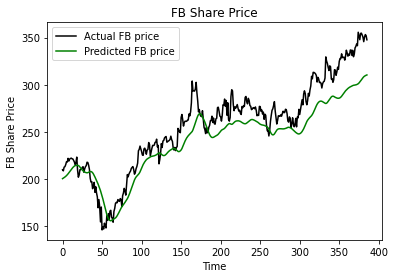

In [23]:
'''Make predictions on test data'''

X_test = []

for x in range(prediction_days, len(model_inputs)):
    
    X_test.append(model_inputs[x - prediction_days:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color='black', label=f'Actual {company} price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [ ]:
# Predict Next DAy

real_data = [model_inputs]

# BITCOIN DIRTY

In [24]:
# Load Data
company = 'bitcoin'

start = '01/01/2010'
end = '01/01/2020'

# data = web.DataReader(company, 'yahoo', start, end)
data = ipy.get_crypto_historical_data(crypto=company,
                                      from_date=start,
                                      to_date=end)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60

X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    
    X_train.append(scaled_data[x - prediction_days: x, 0])
    y_train.append(scaled_data[x, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
# Train Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
107/107 [==============================] - 7s 39ms/step - loss: 0.0031
Epoch 2/20
107/107 [==============================] - 4s 39ms/step - loss: 0.0013
Epoch 3/20
107/107 [==============================] - 4s 39ms/step - loss: 0.0012
Epoch 4/20
107/107 [==============================] - 4s 39ms/step - loss: 0.0010
Epoch 5/20
107/107 [==============================] - 4s 38ms/step - loss: 0.0010
Epoch 6/20
107/107 [==============================] - 4s 39ms/step - loss: 9.3916e-04
Epoch 7/20
107/107 [==============================] - 4s 39ms/step - loss: 8.0872e-04
Epoch 8/20
107/107 [==============================] - 4s 39ms/step - loss: 9.6361e-04
Epoch 9/20
107/107 [==============================] - 5s 43ms/step - loss: 8.3648e-04
Epoch 10/20
107/107 [==============================] - 5s 45ms/step - loss: 7.6363e-04
Epoch 11/20
107/107 [==============================] - 5s 51ms/step - loss: 7.2209e-04
Epoch 12/20
107/107 [==============================] - 5s 44ms/step - lo

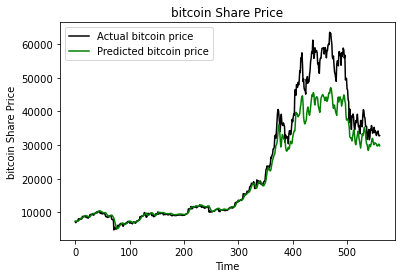

In [28]:
'''Test model accuracy on existing data'''

# Load test data
test_start = '01/01/2020'

today = dt.date.today()
today_proper = today.strftime("%d/%m/%Y")
test_end = today_proper

test_data = ipy.get_crypto_historical_data(crypto=company,
                                      from_date=test_start,
                                      to_date=test_end)

# If you utilize test/train/split then X_test will function as t
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']))

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

'''Make predictions on test data'''

X_test = []

for x in range(prediction_days, len(model_inputs)):
    
    X_test.append(model_inputs[x - prediction_days:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the test predictions
plt.plot(actual_prices, color='black', label=f'Actual {company} price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()